In [1]:
!pip install scikit-fuzzy

c:\Users\LAKSHMI SRI LASYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


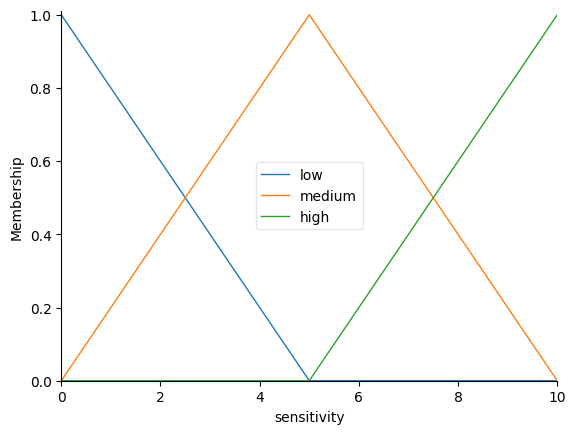

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# Define the universe of discourse
username = ctrl.Antecedent(np.arange(0, 6, 1), 'username')
password = ctrl.Antecedent(np.arange(0, 6, 1), 'password')
email = ctrl.Antecedent(np.arange(0, 6, 1), 'email')
phone_number = ctrl.Antecedent(np.arange(0, 6, 1), 'phone_number')
sensitivity = ctrl.Consequent(np.arange(0, 11, 1), 'sensitivity')
# Define the membership functions
username.automf(3)
password.automf(3)
email.automf(3)
phone_number.automf(3)
sensitivity['low'] = fuzz.trimf(sensitivity.universe, [0, 0, 5])
sensitivity['medium'] = fuzz.trimf(sensitivity.universe, [0, 5, 10])
sensitivity['high'] = fuzz.trimf(sensitivity.universe, [5, 10, 10])
# Define the fuzzy rules
rule1 = ctrl.Rule(username['poor'] & password['poor'] & email['poor'] & phone_number['poor'], sensitivity['low'])
rule2 = ctrl.Rule(username['average'] & password['average'] & email['average'] & phone_number['average'], sensitivity['medium'])
rule3 = ctrl.Rule(username['good'] & password['good'] & email['good'] & phone_number['good'], sensitivity['high'])
rule4 = ctrl.Rule(username['poor'] & password['good'] & email['good'] & phone_number['good'], sensitivity['high'])
rule5 = ctrl.Rule(username['poor'] & password['poor'] & email['good'] & phone_number['poor'], sensitivity['high'])
rule6 = ctrl.Rule(username['poor'] & password['poor'] & email['good'] & phone_number['poor'], sensitivity['high'])
rule7 = ctrl.Rule(username['poor'] & password['poor'] & email['good'] & phone_number['good'], sensitivity['high'])
# Create the control system
sensitivity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7])
# Create the simulation
sensitivity_sim = ctrl.ControlSystemSimulation(sensitivity_ctrl)
sensitivity.view(sim=sensitivity_sim)

In [3]:
import re
# Define the regular expressions for sensitive data fields
username_regex = re.compile(r'\busername\b')
password_regex = re.compile(r'\bpassword\b')
email_id_regex = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
phone_number_regex = re.compile(r'\b\d{3}[-.\s]??\d{3}[-.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-.\s]??\d{4}|\d{3}[-.\s]??\d{4}\b')
# Assign numbers to these fields
username_number =5
password_number = 5
email_id_number = 5
phone_number_number = 5
# Get user input
user_input = input("Enter text: ")
# Initialize a dictionary to hold the fuzzy system input
fuzzy_input = {'username': 0, 'password': 0, 'email_id': 0, 'phone_number': 0}
# Identify these fields in the user input and assign them their respective numbers
if username_regex.search(user_input):
    fuzzy_input['username'] = username_number
if password_regex.search(user_input):
    fuzzy_input['password'] = password_number
if email_id_regex.search(user_input):
    fuzzy_input['email_id'] = email_id_number
if phone_number_regex.search(user_input):
    fuzzy_input['phone_number'] = phone_number_number
print("Fuzzy system input:", fuzzy_input)

Fuzzy system input: {'username': 0, 'password': 0, 'email_id': 5, 'phone_number': 5}


In [4]:
# Create a new cell in the Jupyter Notebook

# Import the necessary modules if not already imported
import skfuzzy as fuzz
# Create a new instance of ControlSystemSimulation
sensitivity_sim = ctrl.ControlSystemSimulation(sensitivity_ctrl)
# Set the inputs of the simulation using the fuzzy_input dictionary
sensitivity_sim.input['username'] = fuzzy_input['username']
sensitivity_sim.input['password'] = fuzzy_input['password']
sensitivity_sim.input['email'] = fuzzy_input['email_id']
sensitivity_sim.input['phone_number'] = fuzzy_input['phone_number']
# Compute the outputs of the simulation
sensitivity_sim.compute()
# Access the sensitivity rate
sensitivity_rate = sensitivity_sim.output['sensitivity']
if sensitivity_rate >= 5 and sensitivity_rate <= 10:
    classification = 'Highly Sensitive'
elif sensitivity_rate >= 0 and sensitivity_rate < 5:
    classification = 'Medium Sensitivity'
else:
    classification = 'Low Sensitivity'
print("Sensitivity Rate:", sensitivity_rate)
print("Classification:", classification)


Sensitivity Rate: 8.333333333333334
Classification: Highly Sensitive
